# Titanic Survival을 예측하는 모델 연습입니다. (Version 1.0)
### (1) 기본 데이터 셋 내에 있는 변수를 바탕으로 모델을 구성하였습니다.
### (2) Logistic Regression을 통해서만 실시하였습니다.
#### 향후 다양한 모델링과 다양한 변수 구성을 통하여 Accuracy를 높여갈 예정입니다. 

email: suengjae.hong@gmail.com

Linkedin: www.linkedin.com/in/suengjaehong


In [31]:
# Suengjae Hong (2018.06.11.)
# Predicting Titanic survival

library(dplyr)
library(ggplot2) # visualization 
library(scales) # visualization 
library(caTools) # prediction: splitting dataset
library(car) # prediction: multicolinearity & vif
library(leaps) # for regsubsets

## DELETE when the code is done
setwd("~/kaggle/titanic_survival") 

# turn off warning options
options(warn=-1) # to set as 0 indicates turn on the warning options

# read all dataset
train <- read.csv('train.csv')
test <- read.csv('test.csv')

# combine dataset
titanic <- bind_rows(train,test)

먼저 패키지를 불러들이고, train dataset과 test dataset을 합쳤습니다. 

test dataset에는 survived와 관련한 결과 변수 column이 없는 관계로 merge한 결과 NA가 반환될 것입니다. 

본 Jupyter Note에서 error 코드가 뜨는 것을 무시하기 위하여 options을 설정하였습니다.

In [32]:
str(titanic) # show description

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [33]:
str(train) # show description

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


첫 번째 요약본은 train과 test를 합친 다음 요약표입니다. 그리고 두 번째 요약본은 train에 대한 요약표 입니다. 본 데이터의 경우는 PassengerId와 해당 승객들의 생존여부를 비롯하여 이름, 성별, 연령, 가족 관계, 티켓과 관련한 기타 정보(티켓 번호, 티켓 요금, 승무원 여부, 탑승 구역)들이 담겨 있습니다.

In [34]:
head(train,10)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


다음은 train set에 대한 10개 데이터 요약본입니다. 유추 할 수 있는 점들은 Pclass가 낮은 번호일 경우 요금이 높기 때문에 1등석 ~ 3등석을 의미한다는 점입니다. 다음으로 유용한 정보는 SibSp와 Parch를 통하여 각 승객 별 가족 관계를 파악 할 수 있다는 것입니다. 아마 Last Name으로 구분을 할 수 있을 것 같습니다. Cabin에 대한 분류는 어떠한 점을 의미하는지는 모르겠습니다. 

마지막으로 Embarked, 즉 탑승 구역과 관련해서는 C, Q, S의 구역이 존재하고, missing이 존재하는 것 같습니다.

In [35]:
# colSums(is.na(titanic)|titanic=='')
sapply(train, function(x) sum(is.na(x))) # finding missing values

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

먼저 데이터 셋에서 Missing Value가 어디에 있는지 확인을 하였습니다. 

먼저 Survived에 418개의 Missing Value는 Test set에 있는 데이터의 수입니다. 현재는 전처리 과정이기 때문에 Survived의 418개의 missing은 크게 중요하지 않습니다.

그러나 Age의 경우 263명이 missing value입니다. 이와 관련하여서는 추후에 missing value 처리를 하도록 하겠습니다.
Fare에는 1개의 Missing value가 Cabin에는 1014개의 missing value가 있습니다. 마지막으로 탑승구역(Embarked)에는 2개의 Missing이 존재합니다. 

In [36]:
sapply(train, function(x) length(unique(x))) # finding unique values

PassengerId    Survived      Pclass        Name         Sex         Age 
        891           2           3         891           2          89 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          7           7         681         248         148           4

다음으로 각 변수별로 uniqueness를 찾았습니다. 데이터 별 level로 생각을 하면 될 것 같습니다. 현재 train dataset에서는 PassengerID가 891개의 level로 구성되어 있습니다. 그리고 그러한 숫자만큼 Name이 분류가 되어 있기 때문에 사람들의 이름 역시 동명이인이 없음을 추론 할 수 있습니다.

임시적으로 train데이터를 바탕으로 logit 분석을 실시하였습니다.

In [37]:
# check logistic Regression
train$Pclass2 <- as.factor(train$Pclass)
glm_train <- glm(Survived ~ factor(Pclass2)+factor(Sex)+factor(Embarked)+Age+SibSp+Parch+Fare, data=train, family=binomial(link='logit'))
summary(glm_train)


Call:
glm(formula = Survived ~ factor(Pclass2) + factor(Sex) + factor(Embarked) + 
    Age + SibSp + Parch + Fare, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7220  -0.6455  -0.3770   0.6293   2.4461  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        16.691979 607.920015   0.027 0.978095    
factor(Pclass2)2   -1.189637   0.329197  -3.614 0.000302 ***
factor(Pclass2)3   -2.395220   0.343356  -6.976 3.04e-12 ***
factor(Sex)male    -2.637859   0.223006 -11.829  < 2e-16 ***
factor(Embarked)C -12.259048 607.919885  -0.020 0.983911    
factor(Embarked)Q -13.082427 607.920088  -0.022 0.982831    
factor(Embarked)S -12.661895 607.919868  -0.021 0.983383    
Age                -0.043308   0.008322  -5.204 1.95e-07 ***
SibSp              -0.362925   0.129290  -2.807 0.005000 ** 
Parch              -0.060365   0.123944  -0.487 0.626233    
Fare                0.001451  

train data set에서 Age가 177개의 missing value가 있기 때문에 모델에서는 빠졌습니다. 향후 Age missing value에 대한 예측을 해야 함을 암시하고 있습니다. Age의 경우 상당한 설명력을 갖고 있기 때문에 상당히 중요한 변수라고 생각 할 수 있습니다. 이 모델을 통해 예상을 해보면,

(1) 여성보다 남성의 경우 더 많이 사망 할 확률이 높고

(2) 1등석의 승객이 더 많이 살아남을 확률이 높고

(3) 나이가 젊을수록 더욱 많이 살아 남을 확률이 높고

(4) SibSp가 낮을수록, 즉 형제/자매의 수가 적은 사람일수록 살아남을 확률이 높습니다. 

그렇다면, 어떠한 설명변수가 가장 높은 예측력을 갖는지 측정을 해보도록 하겠습니다.

In [38]:
regsub <- regsubsets(Survived ~ factor(Pclass)+factor(Sex)+factor(Embarked)+Age+SibSp+Parch+Fare, data=train)
summary(regsub)

Subset selection object
Call: regsubsets.formula(Survived ~ factor(Pclass) + factor(Sex) + 
    factor(Embarked) + Age + SibSp + Parch + Fare, data = train)
10 Variables  (and intercept)
                  Forced in Forced out
factor(Pclass)2       FALSE      FALSE
factor(Pclass)3       FALSE      FALSE
factor(Sex)male       FALSE      FALSE
factor(Embarked)C     FALSE      FALSE
factor(Embarked)Q     FALSE      FALSE
factor(Embarked)S     FALSE      FALSE
Age                   FALSE      FALSE
SibSp                 FALSE      FALSE
Parch                 FALSE      FALSE
Fare                  FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         factor(Pclass)2 factor(Pclass)3 factor(Sex)male factor(Embarked)C
1  ( 1 ) " "             " "             "*"             " "              
2  ( 1 ) " "             "*"             "*"             " "              
3  ( 1 ) " "             "*"             "*"             " "              
4  ( 1 ) "*"         

regsubsets()의 함수는 채택하게 되는 독립변수의 개수(N)이 존재 할 수 있는 모든 경우의 수, 즉 2^N에 대하여 가장 최적의 선택을 할 수 있게끔 알려주는 함수입니다.

결과로부터 확인을 한다면, 단 하나의 변수만 넣는다면 '성별'이 가장 주요한 변수이고 이후, Pclass3 (3등석 여부), Age, Pclass2 (2등석 여부), SibSp의 여부 순으로 중요한 설명력을 갖는다고 생각 할 수 있습니다. 사실 Fare의 경우 두번 째로 낮은 설명력을 갖는다고 볼 수 있는데, 이는 어쩌면 이미 Pclass에 의하여 결정되는 요소이기 때문일지도 모릅니다. Fare의 경우 Embarked와 Pclass에 의하여 결정되는 요소일테니까요. 

따라서 이 두 가지 변수를 제외하고 다시 분석을 해보았습니다.

In [39]:
glm_train2 <- glm(Survived ~ factor(Sex)+Age+SibSp+Parch+Fare, data=train, family =binomial(link='logit'))
summary(glm_train2)


Call:
glm(formula = Survived ~ factor(Sex) + Age + SibSp + Parch + 
    Fare, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5661  -0.6868  -0.5385   0.7323   2.3106  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.557319   0.286161   5.442 5.27e-08 ***
factor(Sex)male -2.533418   0.205163 -12.348  < 2e-16 ***
Age             -0.021514   0.007182  -2.996 0.002739 ** 
SibSp           -0.408306   0.122608  -3.330 0.000868 ***
Parch           -0.232515   0.117337  -1.982 0.047523 *  
Fare             0.017247   0.003143   5.487 4.08e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 695.26  on 708  degrees of freedom
  (177 observations deleted due to missingness)
AIC: 707.26

Number of Fisher Scoring iterations: 5


예상대로 Pclass에서 * 이 뜨던 것이 Fare에 의하여 설명이 되었다고 봅니다. 이후 이 다섯가지 요소에 대하여 상대적으로 얼마나 높은 설명력을 갖는지 분석하였습니다.

In [40]:
regsub2 <- regsubsets(Survived ~ factor(Sex)+Age+SibSp+Parch+Fare, data=train)
summary(regsub2)

Subset selection object
Call: regsubsets.formula(Survived ~ factor(Sex) + Age + SibSp + Parch + 
    Fare, data = train)
5 Variables  (and intercept)
                Forced in Forced out
factor(Sex)male     FALSE      FALSE
Age                 FALSE      FALSE
SibSp               FALSE      FALSE
Parch               FALSE      FALSE
Fare                FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         factor(Sex)male Age SibSp Parch Fare
1  ( 1 ) "*"             " " " "   " "   " " 
2  ( 1 ) "*"             " " " "   " "   "*" 
3  ( 1 ) "*"             " " "*"   " "   "*" 
4  ( 1 ) "*"             "*" "*"   " "   "*" 
5  ( 1 ) "*"             "*" "*"   "*"   "*" 

성별, 요금, SibSp, 연령, Parch 순서로 중요하다고 설명을 합니다.

In [41]:
sapply(titanic, function(x) sum(is.na(x))) # finding missing values

PassengerId    Survived      Pclass        Name         Sex         Age 
          0         418           0           0           0         263 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           1           0           0

따라서 Age에 대한 missing value를 어떻게 처리하는지에 따라 나머지 418개의 학습 결과(test set)의 예측력이 크게 달라질 것으로 예상을 합니다. 그렇다면 missing value를 그대로 무시해도 괜찮을지 혹은 어느정도 예측을 해야 할지 알아볼 필요가 있습니다.

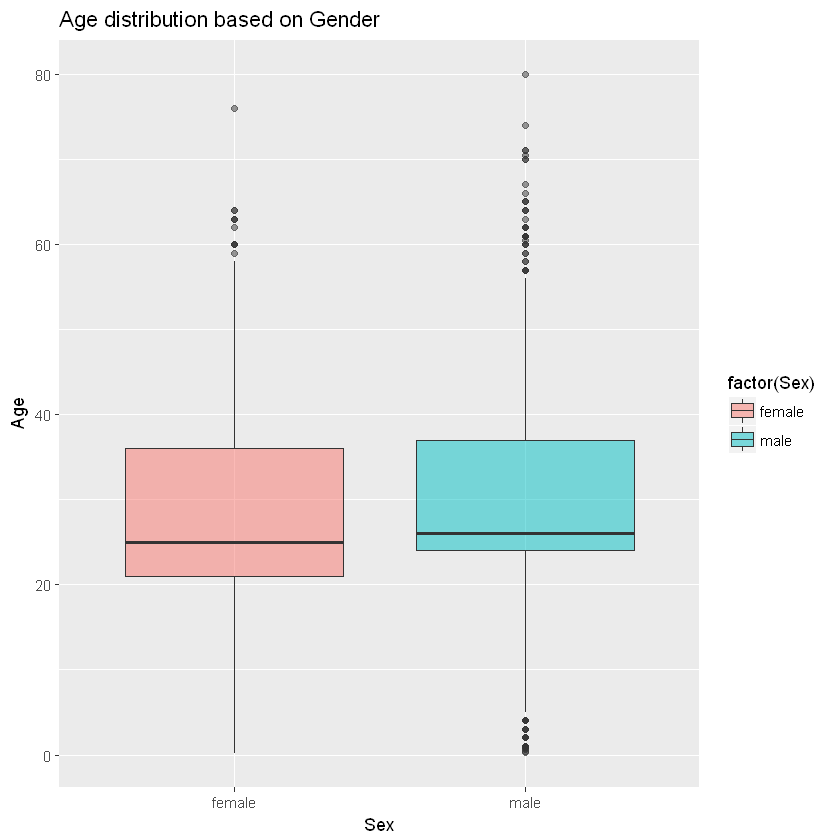

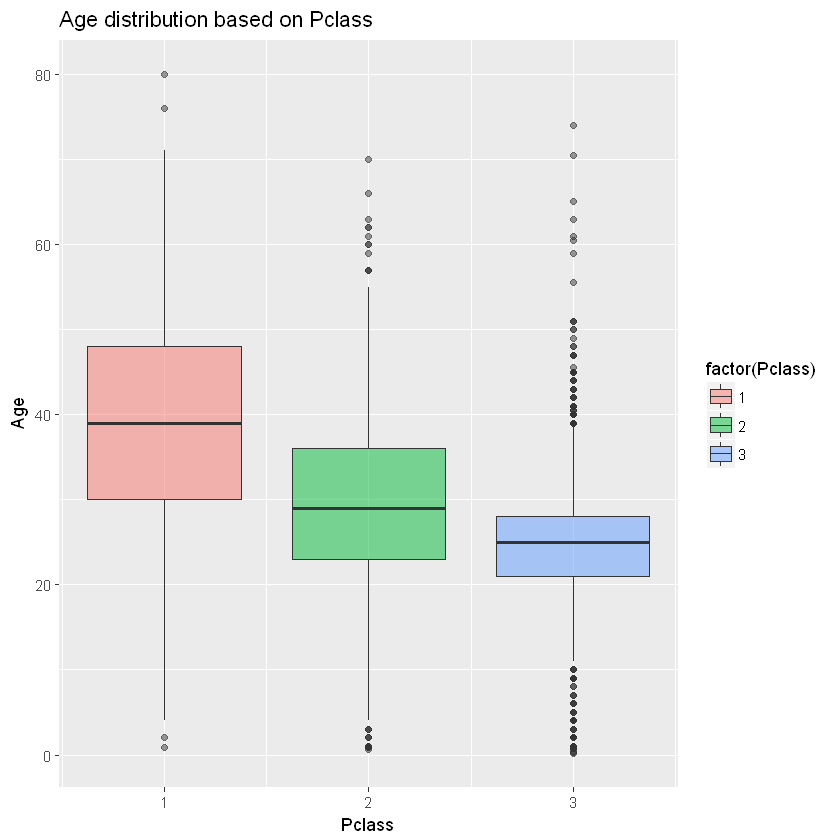

In [60]:
ggplot(titanic,aes(Sex,Age)) +                                                  
  geom_boxplot(aes(fill=factor(Sex)),alpha=0.5) +
  ggtitle("Age distribution based on Gender")

ggplot(titanic,aes(Pclass,Age)) +                                                  
  geom_boxplot(aes(fill=factor(Pclass)),alpha=0.5) +
  ggtitle("Age distribution based on Pclass")

<img src="files/AgeBasedonGender.png"> 성별에 따른 연령의 분포를 그렸습니다. 성별 간에는 연령차가 커보이지 않습니다. 
<img src="files/AgeBasedonPclass.png"> P Class, 즉 객실의 등급에 따른 연령 분포를 그렸습니다. 확실한 점은 보다 높은 등급의 객실에 있는 승객들의 나이가 많다는 점을 알 수 있습니다.

***FYI: 현재 Juypter Notebook 환경 상에서 R의 ggplot이 실행이 되지 않고 있습니다. 이에 따라 R Studio를 통해 이미지를 받은 뒤, 해당 이미지를 첨부하였습니다.*** (이후 R 상에서 Jupyter notebook에서 실행되는 패키지를 설치하였더니 오류가 해결되었습니다)

In [43]:
# Imputation of Age based on Pclass
impute.age <- function(age,class){
  vector <- age
  for (i in 1:length(age)){
    if (is.na(age[i])){
      if (class[i] == 1){
        vector[i] <- round(mean(filter(titanic,Pclass==1)$Age, na.rm=TRUE),0)
      }else if (class[i] == 2){
        vector[i] <- round(mean(filter(titanic,Pclass==2)$Age, na.rm=TRUE),0)
      }else{
        vector[i] <- round(mean(filter(titanic,Pclass==3)$Age, na.rm=TRUE),0)
      }
    }else{
      vector[i]<-age[i]
    }
  }
  return(vector)
}
imputed.age <- impute.age(titanic$Age,titanic$Pclass)
titanic$Age <- imputed.age

본 코드는 Kaggle에 올라와 있는 [Thilaksha Silva의 설명](https://www.kaggle.com/thilakshasilva/predicting-titanic-survival-using-five-algorithms/notebook) 에서 PClass에 따른 Age 의 평균 값들을 입력하는 내용을 가지고 왔습니다. 코드에 대해 간략하게 설명을 하면 다음과 같습니다.

impute.age라는 함수를 설정을 하는데, titanic$Age에 나와 있는 전체 행을 단일 벡터로 설정을 한 뒤에 해당 벡터가 missing일 경우, class에 해당하는 사람들이 갖고 있는 non-missing values 중 age의 평균 값을 missing 값이 들어 있는 vector에 입력을 하는 function입니다. non-missing일 경우 해당 값을 그대로 집어 넣습니다. 

In [54]:
sapply(titanic, function(x) sum(is.na(x))) # finding missing values

PassengerId    Survived      Pclass        Name         Sex         Age 
          0         418           0           0           0           0 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           1           0           0

이후 수행한 결과, titanic의 dataset에는 Survived에 대한 missing (최종적으로 학습 한 결과를 예측하는 value)를 제외하고 Fare에 대한 missing이 존재합니다. 

In [55]:
# Splitting the dataset into the Training set and Test set
trainset <- titanic[1:891, c("Survived","Sex","Age","SibSp","Parch","Fare")]
testset <- titanic[892:1309, c("Sex","Age","SibSp","Parch","Fare")]

trainset과 testset을 구분하였습니다. 이후 train set에서 학습의 정확성을 측정하기 위하여 또 다시 random하게 sampling을 합니다. 일반적으로 stratification (계층 샘플링)을 통하여 진행을 합니다 [(Raschka, 2016)](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html). 그러나 여기에서는 난수를 부여하여 비계층화된 랜덤 샘플링을 진행하였습니다. 

In [46]:
set.seed(123)
split = sample.split(trainset$Survived, SplitRatio = 0.8)
train_split = subset(trainset, split == TRUE)
test_split = subset(trainset, split == FALSE)

In [47]:
cor(train_split[,unlist(lapply(train_split,is.numeric))], use="pairwise.complete.obs")

,Survived,Age,SibSp,Parch,Fare
Survived,1.00000000,-0.05240353,-0.03195028,0.08050072,0.2339924
Age,-0.05240353,1.00000000,-0.23516567,-0.16117344,0.1020722
SibSp,-0.03195028,-0.23516567,1.00000000,0.43707325,0.1994916
Parch,0.08050072,-0.16117344,0.43707325,1.00000000,0.2391090
Fare,0.23399240,0.10207219,0.19949163,0.23910895,1.0000000


저는 현재 모델에서 Sex(factor variable), Age, SibSp, Parch, Fare를 통해 Survived를 예측하려고 합니다. 따라서 Factor Variable을 제외한 나머지 값들의 Correlation Table을 구성하였습니다. SibSp와 Parch의 상관관계가 0.44 가량 되지만, 다중공선성 문제가 있다고 볼 수는 없을 것 같습니다. 

In [50]:
# Fitting Logistic Regression to the Training set
classifier = glm(Survived ~ factor(Sex)+Age+SibSp+Parch+Fare, data=train_split, family =binomial(link='logit'))
summary(classifier)
vif(classifier)
durbinWatsonTest(classifier)


Call:
glm(formula = Survived ~ factor(Sex) + Age + SibSp + Parch + 
    Fare, family = binomial(link = "logit"), data = train_split)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3610  -0.6504  -0.5480   0.7148   2.3136  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.612388   0.304442   5.296 1.18e-07 ***
factor(Sex)male -2.696001   0.208182 -12.950  < 2e-16 ***
Age             -0.019058   0.008071  -2.361 0.018213 *  
SibSp           -0.363280   0.107162  -3.390 0.000699 ***
Parch           -0.204586   0.125485  -1.630 0.103025    
Fare             0.012680   0.002757   4.599 4.24e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 949.90  on 712  degrees of freedom
Residual deviance: 684.33  on 707  degrees of freedom
AIC: 696.33

Number of Fisher Scoring iterations: 4


factor(Sex)         Age       SibSp       Parch        Fare 
   1.129681    1.107207    1.288170    1.314005    1.166215

 lag Autocorrelation D-W Statistic p-value
   1    -0.004349987      2.003968    0.97
 Alternative hypothesis: rho != 0

해당 변수 간의 VIF을 측정해 본 결과, 변수 간에는 multicollinearity issue는 없습니다. (일반적으로 VIF 계수가 10이 넘을 경우, 문제가 있다고 합니다). 그리고 종속변수 (Survived)의 자기상관성(autocorrelation)을 측정하는 항목으로써 Durbin-Watson Test를 실시하였고, 결과는 2로써 종속변수 간에는 사실상 독립적인 상태라고 볼 수 있습니다.

In [59]:
prob_pred <- predict(classifier, type = 'response', newdata = test_split)
y_pred <- ifelse(prob_pred > 0.5, 1, 0)

# Checking the prediction accuracy
table(test_split$Survived, y_pred > 0.5) # Confusion matrix

# print accuracy
error <- mean(test_split$Survived != y_pred) # Misclassification error
paste('Accuracy of this model is',round(1-error,4))

   
    FALSE TRUE
  0    91   19
  1    21   47

[1] "Accuracy of this model is 0.7753"

이후 모델에 대해서 predict 함수를 통하여 해당 모델의 예측 값을 측정하였습니다. 이후 predict를 통해 예측된 값을 test_split으로 구분한 데이터 셋에 적용을 시켰습니다. 이후 해당 데이터(test_split)에서 predict 된 값이 0.5를 넘길 경우 (logit 분석에 의해 측정된 결과이므로) survived되었다고 판단을 하였습니다. 

이후 해당 값에 대하여 참-거짓 table을 만들어 비교를 한 뒤, error값을 측정을 하였습니다. 

최종적으로 현재 제가 구성한 모델의 정확도는 77.53%로 측정이 되었습니다.